In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import scipy

from sklearn.linear_model import QuantileRegressor
from scipy.optimize import linprog

# Linear Regression

### Sample dataset

Text(0, 0.5, 'y')

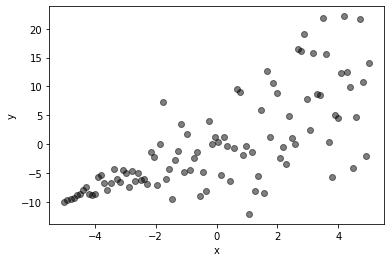

In [92]:
import pandas as pd
import numpy as np

# サンプルデータ作成
np.random.seed(seed=32)
sample_size = 100
x = np.linspace(-5, 5, sample_size)
y = np.random.normal(loc = 2*x, scale = [0.1*i for i, _ in enumerate(x)])
data = pd.DataFrame(np.stack([np.ones(sample_size), x, y], 1), columns = ['X0', 'X1', 'Y'])

# Plot
plt.scatter(data["X1"], data['Y'], color = 'black', alpha = 0.5)
plt.xlabel('x')
plt.ylabel('y')
#plt.savefig(r'H:\マイドライブ\01_Project\Qitta\QR/fig3.png', facecolor = 'w')

### Quantile regression

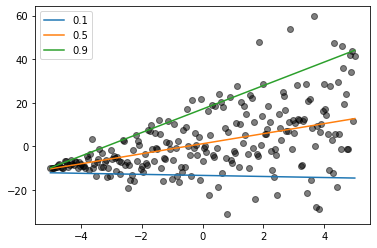

,theta0,theta1,tau
0,-13.319554,-0.241848,0.1
0,1.219235,2.306409,0.5
0,17.117001,5.391761,0.9


In [83]:
import matplotlib.pyplot as plt
from sklearn.linear_model import QuantileRegressor

# データ準備
X = data[['X0', 'X1']].values
y = data['Y'].values

# 分位点回帰実行、回帰直線描画、回帰係数保存
fig, ax = plt.subplots(1, 1)
ax.scatter(data["X1"], data['Y'], color = 'black', alpha = 0.5)
coefficients = pd.DataFrame()
taus = [0.1, 0.5, 0.9]
for t in taus:
    # パラメータ推定
    model = QuantileRegressor(quantile = t, alpha = 0, fit_intercept = False)
    model.fit(X, y)
    # 回帰直線プロット
    ax.plot(X[:,1], model.predict(X), label = t)
    # 回帰係数保存
    temp_data = pd.DataFrame(model.coef_.reshape(1, -1), columns = ['theta0', 'theta1'])
    temp_data['tau'] = t
    coefficients = pd.concat([coefficients, temp_data])
ax.legend()
plt.show()

coefficients

In [84]:
from scipy.optimize import linprog

# データ準備
X = data[['X0', 'X1']].values
y = data['Y'].values

# 分位点回帰実行、回帰係数保存
coefficients = pd.DataFrame()
taus = [0.1, 0.5, 0.9]
for t in taus:
    # 線形計画問題の行列を作成
    b = y.reshape(-1, 1)
    A = np.hstack([X, -1*X, np.identity(X.shape[0]), -1*np.identity(X.shape[0])])
    c = np.vstack([np.zeros((2*X.shape[1], 1)), t*np.ones((X.shape[0], 1)), (1-t)*np.ones((X.shape[0], 1))]).T
    # 線形計画問題を解く
    res = linprog(c, A_eq = A, b_eq = b)
    # 回帰係数計算
    theta_plus = res.x[0:X.shape[1]].reshape(-1, 1)
    theta_minus = res.x[X.shape[1]:2*X.shape[1]].reshape(-1, 1)
    theta = theta_plus - theta_minus
    # 回帰係数保存
    temp_data = pd.DataFrame(theta.T, columns = ['theta0', 'theta1'])
    temp_data['tau'] = t
    coefficients = pd.concat([coefficients, temp_data])
    
coefficients

,theta0,theta1,tau
0,-13.319554,-0.241848,0.1
0,1.219235,2.306409,0.5
0,17.117001,5.391761,0.9


### Quantile lasso regresion

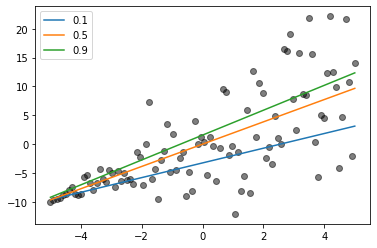

,theta0,theta1,tau
0,-3.251574e+00,1.274167,0.1
0,-2.717030e-12,1.932329,0.5
0,1.568229e+00,2.155932,0.9


In [98]:
import matplotlib.pyplot as plt
from sklearn.linear_model import QuantileRegressor

# データ準備
X = data[['X0', 'X1']].values
y = data['Y'].values

# 正則化パラメータ
alpha = 0.2

# 分位点回帰実行、回帰直線描画、回帰係数保存
fig, ax = plt.subplots(1, 1)
ax.scatter(data["X1"], data['Y'], color = 'black', alpha = 0.5)
coefficients = pd.DataFrame()
taus = [0.1, 0.5, 0.9]
for t in taus:
    # パラメータ推定
    model = QuantileRegressor(quantile = t, alpha = alpha, fit_intercept = False)
    model.fit(X, y)
    # 回帰直線プロット
    ax.plot(X[:,1], model.predict(X), label = t)
    # 回帰係数保存
    temp_data = pd.DataFrame(model.coef_.reshape(1, -1), columns = ['theta0', 'theta1'])
    temp_data['tau'] = t
    coefficients = pd.concat([coefficients, temp_data])
ax.legend()
plt.show()

coefficients

In [106]:
from scipy.optimize import linprog

# データ準備
X = data[['X0', 'X1']].values
y = data['Y'].values

# 正則化パラメータ
alpha = 0.2

# 分位点回帰実行、回帰係数保存
coefficients = pd.DataFrame()
taus = [0.1, 0.5, 0.9]
for t in taus:
    
    # 線形計画問題の行列を作成
    b = y.reshape(-1, 1)
    A = np.hstack([X, -1*X, np.identity(X.shape[0]), -1*np.identity(X.shape[0])])
    c = np.vstack([(alpha*y.shape[0])*np.ones((2*X.shape[1], 1)), t*np.ones((X.shape[0], 1)), (1-t)*np.ones((X.shape[0], 1))]).T
    # 線形計画問題を解く
    res = linprog(c, A_eq = A, b_eq = b)
    # 回帰係数計算
    theta_plus = res.x[0:X.shape[1]].reshape(-1, 1)
    theta_minus = res.x[X.shape[1]:2*X.shape[1]].reshape(-1, 1)
    theta = theta_plus - theta_minus
    # 回帰係数保存
    temp_data = pd.DataFrame(theta.T, columns = ['theta0', 'theta1'])
    temp_data['tau'] = t
    coefficients = pd.concat([coefficients, temp_data])
    
coefficients

,theta0,theta1,tau
0,-3.251574e+00,1.274167,0.1
0,-2.717030e-12,1.932329,0.5
0,1.568229e+00,2.155932,0.9
